# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 22.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
379713,0.1807,0.0024,0.0024,0.0024,0.0977,0.3540,0.4736,0.2246,0.0415,0.2466,3,3,15,15
409834,0.0391,0.0024,0.0024,0.0024,0.0391,0.1733,0.0293,0.0952,0.0488,0.0024,0,0,0,0
94558,0.4248,0.0806,0.0024,0.0391,0.0024,0.0220,0.1709,0.7422,0.0342,0.0977,2,2,12,12
419426,0.0049,0.0024,0.0024,0.0024,0.0073,0.0659,0.0024,0.0098,0.0537,0.0024,0,0,0,0
38393,0.0952,0.0024,0.0049,0.0488,0.0049,0.0586,0.4761,0.2295,0.0366,0.1611,6,0,5,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468122 entries, 0 to 468121
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          468122 non-null  float64
 1   Emg2          468122 non-null  float64
 2   Emg3          468122 non-null  float64
 3   Emg4          468122 non-null  float64
 4   Emg5          468122 non-null  float64
 5   Emg6          468122 non-null  float64
 6   Emg7          468122 non-null  float64
 7   Emg8          468122 non-null  float64
 8   Emg9          468122 non-null  float64
 9   Emg10         468122 non-null  float64
 10  repetition    468122 non-null  int64  
 11  rerepetition  468122 non-null  int64  
 12  stimulus      468122 non-null  int64  
 13  restimulus    468122 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.0 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000,468122.000000
mean,0.147829,0.045038,0.046509,0.059677,0.041971,0.163647,0.318662,0.251931,0.069318,0.165755,3.171002,2.399259,5.617892,4.282864
std,0.224640,0.098812,0.115883,0.142531,0.087394,0.293843,0.445182,0.342322,0.102326,0.235296,3.484690,3.321378,6.579863,6.277879
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009800,0.002400,0.002400,0.002400,0.002400,0.039100,0.024400,0.024400,0.024400,0.004900,0.000000,0.000000,0.000000,0.000000
50%,0.068400,0.002400,0.002400,0.002400,0.009800,0.095200,0.146500,0.114700,0.043900,0.075700,2.000000,0.000000,3.000000,0.000000
75%,0.192900,0.034200,0.034200,0.051300,0.043900,0.173300,0.434600,0.349100,0.073200,0.236800,6.000000,5.000000,10.000000,8.000000
max,3.286100,1.491700,2.517100,2.272900,1.001000,4.221200,4.660600,4.663100,2.624500,2.893100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     198261
4      15624
8      15624
2      15612
12     15604
7      15602
6      15583
9      15570
11     15567
5      15565
3      15537
1      15528
10     15527
13     10388
17     10384
14     10378
15     10346
16     10331
18      5201
19      5200
21      5198
22      5170
20      5162
23      5160
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.278918,-0.748031,-0.769433,0.294295,-0.732813
1,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.309487,-0.748031,-0.769433,0.249707,-0.732813
2,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.324929,-0.748031,-0.769433,0.206028,-0.732813
3,-0.672821,-0.474227,-0.418454,-0.439878,-0.475172,-0.301924,-0.748031,-0.769433,0.183279,-0.732813
4,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.278918,-0.748031,-0.769433,0.183279,-0.732813
...,...,...,...,...,...,...,...,...,...,...
391179,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.525042,-0.748031,-0.762550,-0.171609,-0.732813
391180,-0.683254,-0.496845,-0.418454,-0.439878,-0.475172,-0.509600,-0.748031,-0.755943,-0.149770,-0.732813
391181,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.509600,-0.748031,-0.755943,-0.105181,-0.732813
391182,-0.683254,-0.474227,-0.418454,-0.439878,-0.475172,-0.517478,-0.748031,-0.755943,-0.083342,-0.732813


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
78/78 [==============================] - 3s 29ms/step - loss: 1.3105 - accuracy: 0.6478 - val_loss: 0.8957 - val_accuracy: 0.7523
Epoch 2/100
78/78 [==============================] - 2s 26ms/step - loss: 0.7840 - accuracy: 0.7759 - val_loss: 0.6885 - val_accuracy: 0.7990
Epoch 3/100
78/78 [==============================] - 2s 26ms/step - loss: 0.6496 - accuracy: 0.8092 - val_loss: 0.5977 - val_accuracy: 0.8222
Epoch 4/100
78/78 [==============================] - 2s 27ms/step - loss: 0.5801 - accuracy: 0.8262 - val_loss: 0.5475 - val_accuracy: 0.8371
Epoch 5/100
78/78 [==============================] - 2s 25ms/step - loss: 0.5332 - accuracy: 0.8398 - val_loss: 0.5213 - val_accuracy: 0.8408
Epoch 6/100
78/78 [==============================] - 2s 26ms/step - loss: 0.4950 - accuracy: 0.8492 - val_loss: 0.4691 - val_accuracy: 0.8560
Epoch 7/100
78/78 [==============================] - 2s 26ms/step - loss: 0.4646 - accuracy: 0.8579 - val_loss: 0.4401 - val_accuracy: 0.8650
Epoch 

78/78 [==============================] - 2s 26ms/step - loss: 0.1441 - accuracy: 0.9518 - val_loss: 0.1844 - val_accuracy: 0.9411
Epoch 59/100
78/78 [==============================] - 2s 27ms/step - loss: 0.1441 - accuracy: 0.9520 - val_loss: 0.1809 - val_accuracy: 0.9411
Epoch 60/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1402 - accuracy: 0.9530 - val_loss: 0.1785 - val_accuracy: 0.9424
Epoch 61/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1379 - accuracy: 0.9538 - val_loss: 0.1765 - val_accuracy: 0.9421
Epoch 62/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1365 - accuracy: 0.9547 - val_loss: 0.1698 - val_accuracy: 0.9445
Epoch 63/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1351 - accuracy: 0.9552 - val_loss: 0.1705 - val_accuracy: 0.9445
Epoch 64/100
78/78 [==============================] - 2s 26ms/step - loss: 0.1333 - accuracy: 0.9555 - val_loss: 0.1704 - val_accuracy: 0.9442
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

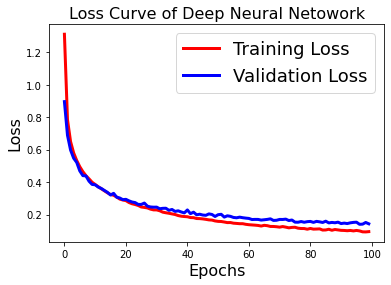

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

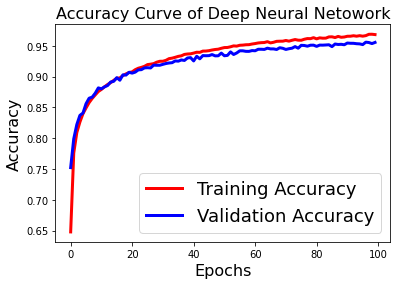

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  0, 14, ...,  9, 12,  4], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 95.56220202717385


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     38515
           1       0.96      0.94      0.95      2230
           2       0.94      0.96      0.95      2492
           3       0.98      0.91      0.94      2287
           4       0.97      0.91      0.94      2382
           5       0.97      0.93      0.95      2085
           6       0.97      0.96      0.96      2100
           7       0.87      0.91      0.89      2214
           8       0.94      0.92      0.93      2027
           9       0.91      0.92      0.92      2459
          10       0.96      0.90      0.93      2065
          11       0.97      0.89      0.92      2165
          12       0.93      0.92      0.93      2444
          13       0.95      0.94      0.94      1593
          14       0.91      0.95      0.93      1568
          15       0.96      0.87      0.91      1629
          16       0.97      0.96      0.96      1641
 

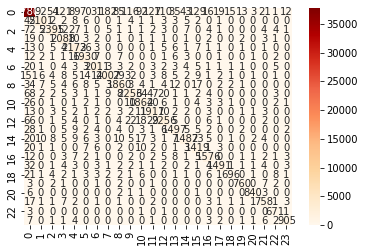

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3309048148574204
MSE: 3.6692485652568476
RMSE: 1.9155282731551753


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9558384708866339
Recall Score :  0.9556220202717385
f1_score :  0.9554549609919674
